## Code to compute likelikood for multplicative and negative binomial case with 1 parameter

# Likelihood for different cases

Now take the value of your state (for instance, from your SIR model where it coincides with a data point)}
\begin{align*}
d = x(1+\epsilon), \quad \epsilon \sim \mathcal{N}(0,\sigma^2)
\end{align*}


multiplicative noise

$$
p(d|x) = \mathcal{N}(x, x^2 \sigma^2)
$$


Gaussian approximation

$$
p(d|x) = \mathcal{N}(\frac{r (1-p)}{p}, \frac{r (1-p)}{p^2})
$$



Negative binomial

$$
p(d|x) = \mathcal{NB}(r,p)
$$



Multiplicative noise mean 500
Multiplicative noise sd 250.0
probability of success 0.008
number of success 4.032258064516129
nomral approximated mean 500.0
nomral approximated sd 250.0
negative binomial mean 500.0
negative binomial sd 250.0


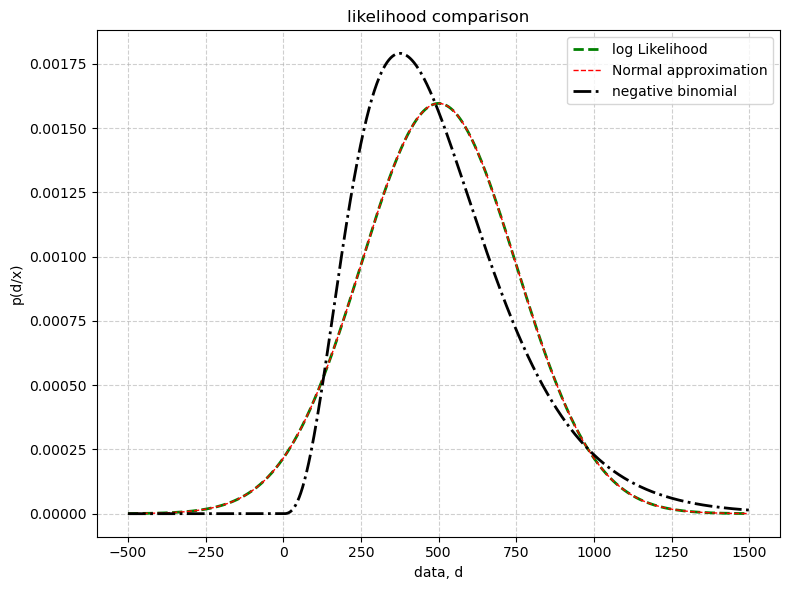

In [85]:
from scipy.integrate import simpson
import numpy as np
import matplotlib.pyplot as plt
 
# Set random seed for reproducibility
np.random.seed(40)

# Parameters
x_true = 500  # True parameter value

## Noise strength
sigma = 0.5  #  # 0.1 - For large number of successes and 0.5 and above for difference in NB and Gaussian approximation


if(sigma**2 < 1/x_true):
    print('VALUE ERROR - CHANGE VALUE OF SIGMA OR X')

# Measurement
epsilon_multiplicative = np.random.normal(loc=0, scale=sigma)

d1 = x_true * (1 + epsilon_multiplicative)

## parameter values
d_values = np.arange(x_true - 1000, x_true + 1000, 1)  # Match x-range with likelihood plot

### Log likelihood for multiplicative noise
log_likelihoods_multiplicative = np.zeros(len(d_values))

for i in range(len(d_values)):
        log_likelihood = -np.log(np.sqrt(2 * np.pi) * sigma * x_true)
        log_likelihood -= (x_true-d_values[i])**2 / (2 * (sigma * x_true)**2)
        log_likelihoods_multiplicative[i] = log_likelihood



print('Multiplicative noise mean', x_true)

print('Multiplicative noise sd', (x_true * sigma))

#### Gaussian Approximation of Negative binomial

p = 1/(sigma**2 * x_true) #probability of observing a postive case (should be greater than 0)

print('probability of success', p)
#dispersion parameter:
r = (p*x_true)/(1-p) #number of successes

print('number of success', r)

nb_normal_mean = r * (1-p)/p

print('nomral approximated mean', nb_normal_mean)

nb_normal_var = r * (1-p)/p**2

print('nomral approximated sd', np.sqrt(nb_normal_var))

from scipy import stats 

y_data = stats.norm.pdf(d_values, nb_normal_mean, np.sqrt(nb_normal_var)) 


#### True negative binomial distribution is

y_data_NB = stats.nbinom.pmf(d_values,r, p)


NBmean, NBvar, NBskew, NBkurt = stats.nbinom.stats(r, p, moments='mvsk')


print('negative binomial mean', NBmean)

print('negative binomial sd', np.sqrt(NBvar))

# Plot histogram, normalized likelihood, and unnormalized likelihood
plt.figure(figsize=(8, 6))
plt.plot(d_values, np.exp(log_likelihoods_multiplicative), color="green", lw=2, linestyle="--", label="log Likelihood")
plt.plot(d_values, y_data, color="red", lw=1, linestyle="--", label="Normal approximation")
plt.plot(d_values, y_data_NB, linestyle="-." , color="black", lw=2, label="negative binomial")
plt.xlabel("data, d")
plt.ylabel("p(d/x)")
plt.title("likelihood comparison")
# plt.xlim(0.1, 50)  # Match x-range with likelihood plot
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()





### Negative binomial

In [3]:
## Generate Synthetic Counts Data (using negative binomial likelihood noise): 
rng = np.random.default_rng(seed=12)



#generate synthetic data:
Ynoisy = rng.negative_binomial(r,kappa) #take observations from the infectious compartment
Yobs = np.rint(Ynoisy[0::hf]) #the ceil function rounds all observations up to the nearest integer
tobs = tlist[0::hf]

NameError: name 'hf' is not defined